# Project Goal
> ## Find Drivers of Heart Disease or Attack

# Initial Hypothesis
> ## I believe that all of the features will be drivers of heart disease or attack

# Imports

In [1]:
# list of my imports
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import wrangle
import seaborn as sns
import matplotlib.pyplot as plt

# Acquire
- Data acuired from Kaggle
- https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
- Each row represents a unique patient and their individual data


In [2]:
# reading the data into a pandas dataframe
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# Prepare 

- There are 253680 rows and 11 columns
- Changed age from integers to correct age bins
- There were no null values
- Visualize full dataset for univariate exploration (histograms and boxplots)
    - Handle outliers
- I got rid of the outliers in BMI by getting rid of the top 1 percent
- Verified datatypes
- made all of the column names lower case
- split the data on the target variable heart disease or attack
- scaled my data with a min max scaler

In [3]:
# preparing my data
df, second_list, the_age, the_list, target, train, validate, test , train_scaled, validate_scaled, test_scaled = wrangle.condenced_prepate(df)

In [4]:
#a brief look at the data
df.head()

,heartdiseaseorattack,highbp,highchol,bmi,smoker,diabetes,hvyalcoholconsump,menthlth,physhlth,sex,age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,18.0,15.0,female,60 to 64
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,female,50 to 54
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,30.0,30.0,female,60 to 64
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,female,70 to 74
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,3.0,0.0,female,70 to 74


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
heartdiseaseorattack,251133.0,0.093974,0.291793,0.0,0.0,0.0,0.0,1.0
highbp,251133.0,0.426965,0.494638,0.0,0.0,0.0,1.0,1.0
highchol,251133.0,0.423839,0.494166,0.0,0.0,0.0,1.0,1.0
bmi,251133.0,28.057372,5.668108,12.0,24.0,27.0,31.0,49.0
smoker,251133.0,0.443410,0.496788,0.0,0.0,0.0,1.0,1.0
diabetes,251133.0,0.292841,0.694120,0.0,0.0,0.0,0.0,2.0
hvyalcoholconsump,251133.0,0.056496,0.230877,0.0,0.0,0.0,0.0,1.0
menthlth,251133.0,3.151000,7.372027,0.0,0.0,0.0,2.0,30.0
physhlth,251133.0,4.186328,8.660582,0.0,0.0,0.0,3.0,30.0


# Univariate Exploration

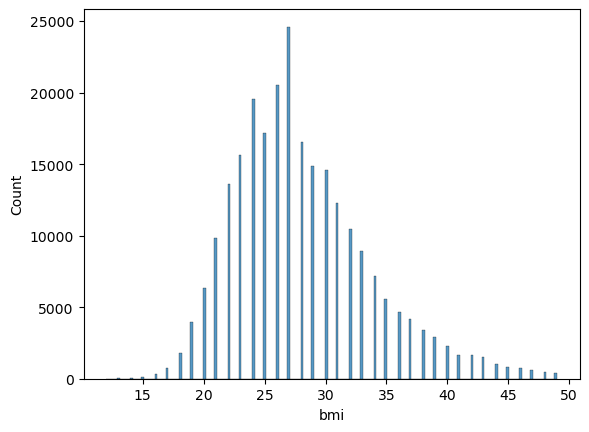

In [6]:
# creates the histplot for bmi
sns.histplot(df['bmi'])
plt.show()

# Bivariate Exploration
> ## Catagorical variables
    - highbp
    - highchol
    - diabetes
    - hvyalcoholconsump
    - smoker
    - sex

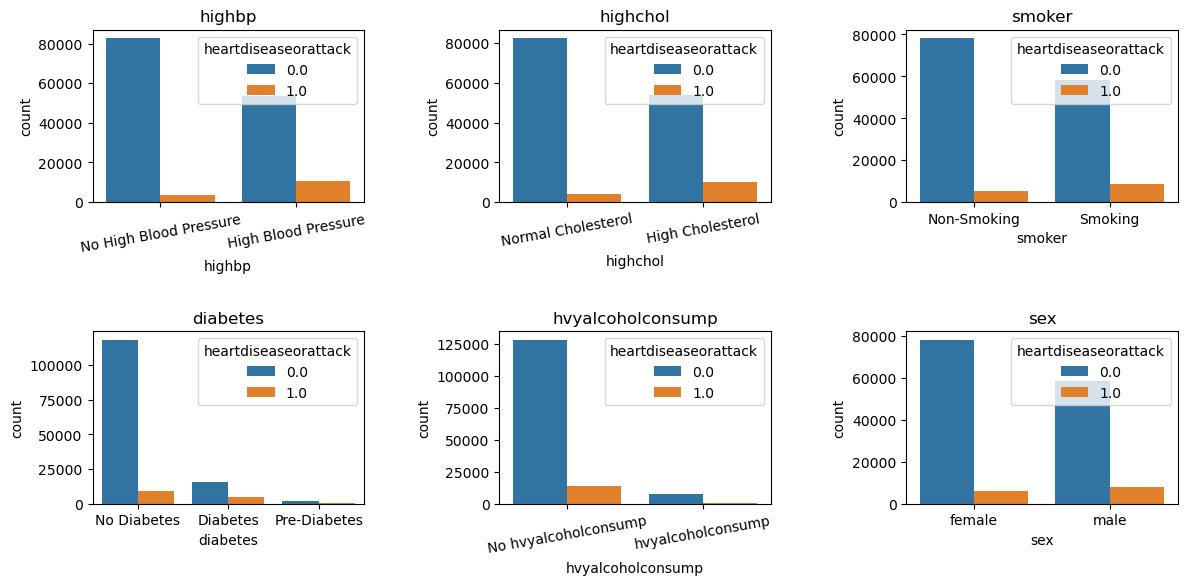

In [7]:
# creates the subplot of countplots
wrangle.bivariate_catagorical(train, the_list)

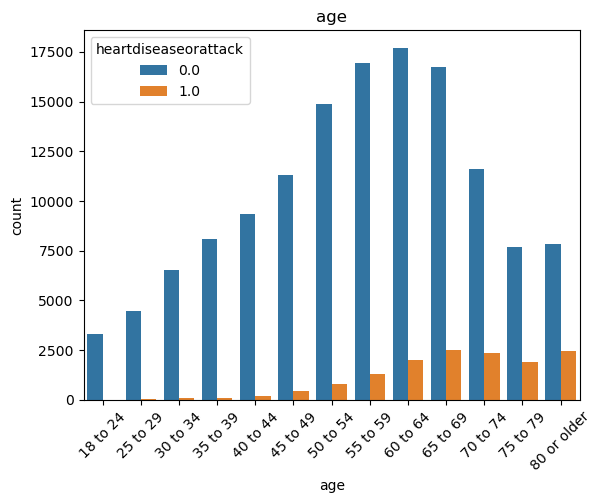

In [8]:
# creates the countplot for age
wrangle.age_visual(train, the_age)

# Chi2 Stats Tests

> Here I ran Chi2 tests on the different catagorical variables towards the target variable
<br>
<br>
> $H_0$: There is no statistical significance between my seleced features and heart disease and attack
<br>
<br>
> $H_\alpha$: There is statistical significance between my seleced features and heart disease and attack
<br>
<br>
$\alpha$: 0.05

In [9]:
# creates chi2 pandas dataframes and concatenates them together
chi2_df1 = wrangle.chi2_test(train, target, the_list)
chi2_df2 = wrangle.chi2_test(train, target, [the_age])
wrangle.combine_two_dataframes(chi2_df1, chi2_df2)

,feature,chi2,p,degf,expected
1,highbp,6565.027700,0.000000e+00,1,"[[58184.95065669403, 78334.04934330597], [6035..."
2,highchol,4838.833711,0.000000e+00,1,"[[57759.11872258245, 78759.88127741756], [5990..."
3,smoker,1994.796753,0.000000e+00,1,"[[75904.99526808647, 60614.00473191354], [7873..."
4,diabetes,5026.595291,0.000000e+00,2,"[[18684.055628189726, 115330.69018907745, 2504..."
5,hvyalcoholconsump,126.462873,2.435150e-29,1,"[[128764.32867221047, 7754.67132778954], [1335..."
6,sex,1179.378651,1.848953e-258,1,"[[76242.94273920055, 60276.05726079945], [7908..."
1,age,8335.600348,0.000000e+00,12,"[[3034.2790368929977, 4064.4299072863505, 5996..."


# Bivariate Exploration
> ## Continuous Variables
    - bmi
    - menthlth
    - physhlth

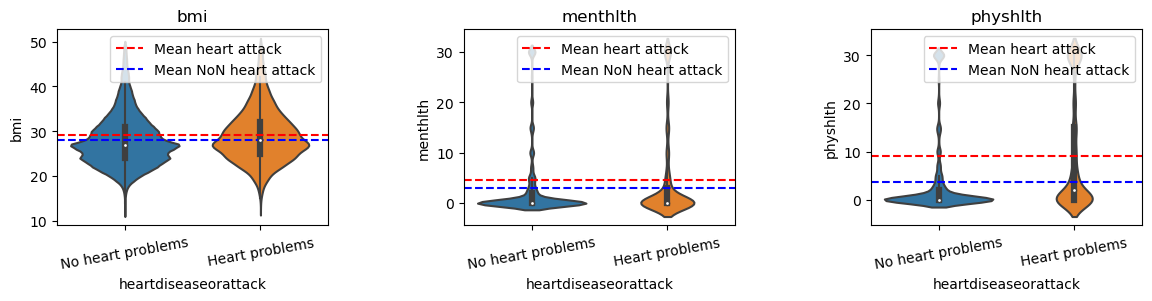

In [10]:
# creates the violinplots for my continuous variables
wrangle.bivariate_continuous(train, second_list)

# Comparison Of Means Stats Test
> Here I ran two sample t tests on the different continuous variables towards the target variable
<br>
<br>
> $H_0$: The means of my seleced features are the same
<br>
<br>
> $H_\alpha$: The means of my seleced features are not the same
<br>
<br>
$\alpha$: 0.05

In [11]:
# creates the t tests pandas dataframe for my continuous variables
wrangle.comparison_of_means(train, second_list)

,Category name,P value
0,bmi,2.406062e-119
0,menthlth,1.371269e-127
0,physhlth,0.000000e+00


# Extra Analysis
>- Diabetes
>- Alcohol consumption
>- Sex

In [12]:
# creates the pandas dataframes for the percentage of people that have heart problems in their respective catagories
the_df = wrangle.extra_analysis(train)
the_df

,No heart problems,Heart problems,Percent heart problems
No diabetes,118192,9101,7.149647
Pre diabetes,2348,416,15.050651
Has diabetes,15979,4643,22.514790
Alcohol free,128469,13651,9.605263
Heavy alcohol,8050,509,5.946956
Female,58344,8184,12.301587
Male,78175,5976,7.101520


# Bivariate Exploration Summary
> - More people with high blood pressure had heart disease or a heart attack more than those that did not
> - More people with high cholestreol had heart disease or a heart attack than those that did not
> - More people that smoked had heart disease or a heart attack than those that did not
> - People with diabeties had heart attacks 15% more than those that didn't have diabetes
> - You are 5% more likely to have a heart attack if you are a female
> - People who consumed heavy amounts of alcohol had heart disease or heart attacks 4% less than those that did not consume heavy amounts of alcohol
    <br> 
    This could be due to small sample size of people who consumed heavy amounts of alcohol

> - People in higher age brackets have a higher percentage of people who have had a heart disease or attack
> - People who have had heart attacks had more days of bad physical health
> - People who have had heart attacks had more days of bad mental health
> - People who have had heart attack and people who didn't have heart attacks have a similar bmi mean


## Means Test Summary
> - Bmi p value is less than alpha meaning we reject the null
> - Menthlth p value is less than alpha meaning we reject the null
> - Physhlth p value is less than alpha meaning we reject the null

## Chi2 Test Summary
> - Highbp p value is less than alpha meaning we reject the null
> - Highchol p value is less than alpha meaning we reject the null
> - Smoker p value is less than alpha meaning we reject the null
> - Diabetes p value is less than alpha meaning we reject the null
> - Hvyalcoholconsump p value is less than alpha meaning we reject the null
> - Sex p value is less than alpha meaning we reject the null
> - Age p value is less than alpha meaning we reject the null

# Multivariate exploration

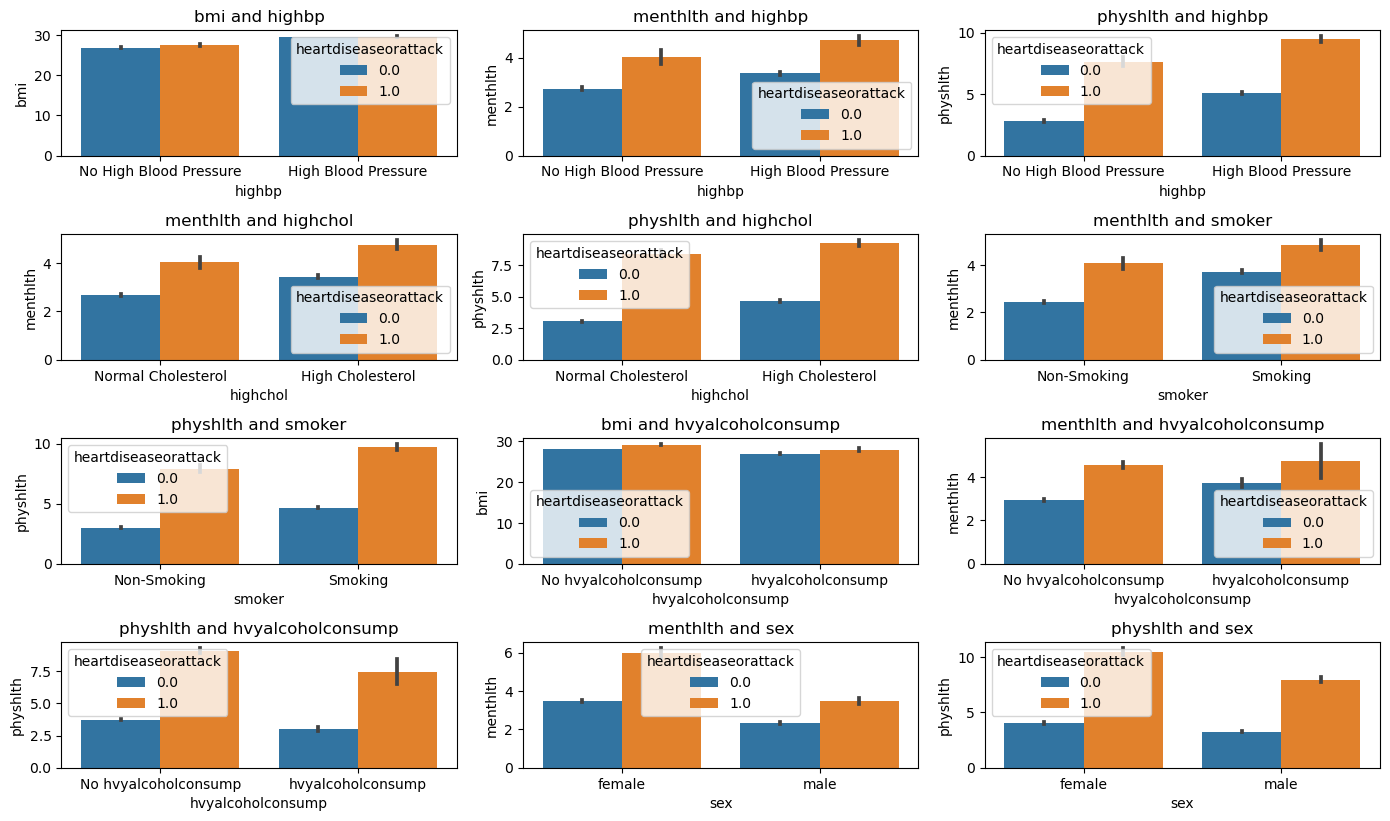

In [13]:
# creates the subplots for multivarate analysis
wrangle.multivariate_exploration_charts(train, the_list, second_list)

# Multivariate Exploration Summary
>** High blood pressure and high cholestreol dependent on a doctor telling the patient if they have them. If the patient does not see a doctor they might still have high blood pressure or cholestreol


>- Out of the people who did have heart problems the people who had high blood pressure had higher bmi that those who did not have high blood pressure
>- Out of the people who have had heart problems the ones with high blood pressure seem to have more bad mental health days
>- Out of the people who did have heart problems the ones with high blood pressure had more bad physical health days
>- Out of the people who did have heart problems the ones who had high cholestreol had more bad mental health days
>- Out of the people who did have heart problems the ones who had high cholestreol had more bad physical health days
>- Out of the people who did have heart problems the ones who smoked had more bad mental health days
>- Out of the people who did have heart problems the ones who smoked had more bad physical health days
>- Out of the people who did have heart problems the ones who didn't consume heavy amounts of alcohol had a higher bmi on average
>- Out of the peopple who did have heart problems the ones who consumed heavy amounts of alcohol had more bad mental health days than those that didn't consume heavy amounts of alcohol
>- Out of the peopple who did have heart problems the ones didn't consume heavy amounts of alcohol tended to have more bad physical health days
>- Out of the people who did have heart problems females had more bad mental health days
>- Out of the people who did have heart problems females had more bad physical health days

# Features I am moving forward with
> - Diabetes
> - Alcohol consumption
> - Sex
> - highbp
> - highchol
> - diabetes
> - hvyalcoholconsump
> - smoker
> - sex

# Modeling
- I will use my accuracy evaluation metric
- people who haven't had a heart attack or disease makeup 90.58% of the data

- by guessing people who havent had a heart attack or disease one could achieve an accuracy of 90.58% <br>
- 90.58% will be the baseline accuracy I use for this project <br>
<br>
- I will be evaluating models developed using four different model types and various hyperparameter configurations 

* Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

In [14]:
# loads the csv's and concatenates the top performing models
the_df, testRF = wrangle.load_all_csv()
the_df

,model_train,train_predict,validate_predict,n_neighbors,difference,C,max_depth
20,KNeighborsClassifier,0.907548,0.904920,20,0.002628,NaN,NaN
1,LogisticRegression,0.905577,0.905412,NaN,0.000164,0.01,NaN
9,RandomForestClassifier,0.905977,0.905925,NaN,0.000053,NaN,9
1,DecisionTreeClassifier,0.905813,0.905826,NaN,0.000013,NaN,1


# Unseen data on random forest model

In [15]:
# shows the unseen data on my best model
testRF

,model_train,baseline,max_depth
0,RandomForestClassifier,0.905814,max_depth
1,RandomForestClassifier,0.906000,9


# Modeling Summary
> * Established baseline to beat at: 90.58%
> * Ran through multiple different classification models.
> * Random Forest at max_depth=9 performed the best with an accuracy score of 90.59%.
> * Ran final model on test data set. Result: 90.6%
> * High blood pressure and physical health had the highest weights in the descision making process

# Conclusion
> * All of the features sent through the models were statistically significant
> * My top model performed beat baseline by .02 % on unseen data
> * Some of the columns are dependent on whether or not the patient has seen a doctor
> * All of my features were a driver of heart disease or attack

# Recommendations
> * I would not recommend using the model because it did not beat baseline by a significant amount


# Next Steps
> * Create new columns out of existing columns to use during the modeling phase
> * Send in different combinations of columns into the different models
> * Gather more data to make the models even more accurate
> * talk to the author of the dataset to get more information on some of the columns